<a href="https://colab.research.google.com/github/mind-shaker/fast_ai_1/blob/main/02_02_deep_learning_convolutions_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imports

In [3]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
from scipy.ndimage import correlate
import numpy as np
from skimage import data
from skimage.color import rgb2gray
from skimage.transform import rescale,resize

# original image input

<class 'numpy.ndarray'>
(64, 64)


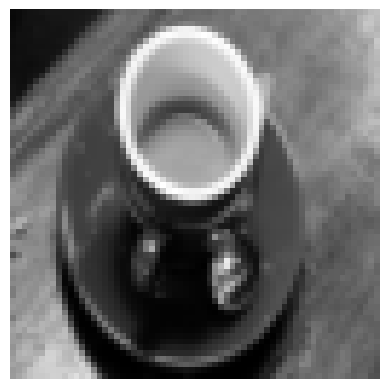

In [4]:
im = rgb2gray(data.coffee())
im = resize(im, (64,64))
print (type(im))
print(im.shape)

plt.axis('off')
plt.imshow(im, cmap = 'gray');



# horizontal edge filter

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05912822 0.06601959 ... 0.70756359 0.71662895 0.        ]
 [0.         0.05668569 0.06812259 ... 0.73323966 0.70709076 0.        ]
 ...
 [0.         0.57966995 0.60120883 ... 0.35315418 0.30828895 0.        ]
 [0.         0.58806399 0.62816429 ... 0.327654   0.32473957 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(66, 66)
65
[-0.05912822 -0.12514781 -0.2090059  -0.24108934 -0.27328321 -0.29327225
 -0.31164444 -0.32332724 -0.33180011 -0.33445953 -0.33573424 -0.33658211
 -0.33879297 -0.35080585 -0.36541113 -0.41469169 -0.54450039 -0.72807369
 -0.96228143 -1.13515088 -1.23383162 -1.23566504 -1.22655523 -1.24309222
 -1.20414663 -1.10694283 -0.98957436 -1.00664255 -1.14049838 -1.26757353
 -1.29388138 -1.24823423 -1.22695164 -1.23196235 -1.22333    -1.23337412
 -1.26633133 -1.30303854 -1.32167367 -1.36600204 -1.41042908 -1.42960641
 -1.40623127 -1.39176465 -1.40698

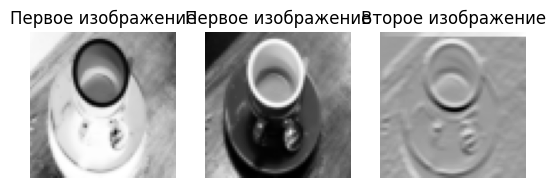

In [12]:



filter1 = np.array([
    [ 1,  1,  1],
    [ 0,  0,  0],
    [-1, -1, -1]
])

new_image = np.zeros(im.shape)

#print (type(new_image))
#print (new_image.shape)
#print (new_image)



im_pad = np.pad(im, 1, 'constant')



count =0

print (im_pad)
print (im_pad.shape)

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        count = count +1
        mark = 1

        try:
            new_image[i,j] = \
            im_pad[i-1,j-1] * filter1[0,0] + \
            im_pad[i-1,j] * filter1[0,1] + \
            im_pad[i-1,j+1] * filter1[0,2] + \
            im_pad[i,j-1] * filter1[1,0] + \
            im_pad[i,j] * filter1[1,1] + \
            im_pad[i,j+1] * filter1[1,2] +\
            im_pad[i+1,j-1] * filter1[2,0] + \
            im_pad[i+1,j] * filter1[2,1] + \
            im_pad[i+1,j+1] * filter1[2,2]
        except:
            mark = 0
            pass

        if (count- math.floor(count/100))>=65 and (count- math.floor(count/100))<=70:
            print (count)
            print (new_image[0])
            if mark:
                print (im_pad[i-1,j-1], "*" , filter1[0,0])
                print (im_pad[i-1,j-1] * filter1[0,0])
                print (im_pad[i-1,j], "*" , filter1[0,1])
                print (im_pad[i-1,j] * filter1[0,1])
                print (im_pad[i-1,j+1], "*" , filter1[0,2])
                print (im_pad[i-1,j+1] * filter1[0,2])
                print (im_pad[i,j-1], "*" , filter1[1,0])
                print (im_pad[i,j-1] * filter1[1,0])
                print (im_pad[i,j], "*" , filter1[1,1])
                print (im_pad[i,j] * filter1[1,1])
                print (im_pad[i,j+1], "*" , filter1[1,2])
                print (im_pad[i,j+1] * filter1[1,2])
                print (im_pad[i+1,j-1], "*" , filter1[2,0])
                print (im_pad[i+1,j-1] * filter1[2,0])
                print (im_pad[i+1,j], "*" , filter1[2,1])
                print (im_pad[i+1,j] * filter1[2,1])
                print (im_pad[i+1,j+1], "*" , filter1[2,2])
                print (im_pad[i+1,j+1] * filter1[2,2])

print (type(new_image))
print (new_image.shape)

print (new_image)



#plt.axis('off')
#plt.imshow(new_image, cmap='Greys');

plt.subplot(1, 3, 1)
plt.imshow(im, cmap='Greys')
plt.axis('off')
plt.title('Первое изображение')

plt.subplot(1, 3, 2)
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.title('Первое изображение')

plt.subplot(1, 3, 3)
plt.imshow(new_image, cmap='Greys')
plt.axis('off')
plt.title('Второе изображение')

plt.show()

# vertical edge filter

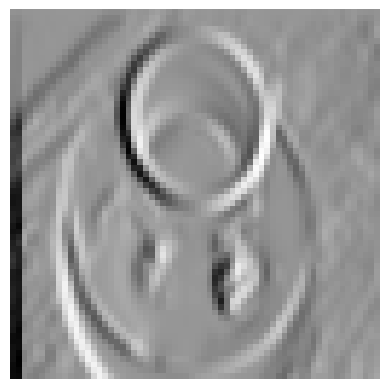

In [7]:
filter2 = np.array([
    [ -1,  0,  1],
    [ -1,  0,  1],
    [ -1,  0,  1]
])

new_image = np.zeros(im.shape)

im_pad = np.pad(im,1, 'constant')

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        try:
            new_image[i,j] = \
            im_pad[i-1,j-1] * filter2[0,0] + \
            im_pad[i-1,j] * filter2[0,1] + \
            im_pad[i-1,j+1] * filter2[0,2] + \
            im_pad[i,j-1] * filter2[1,0] + \
            im_pad[i,j] * filter2[1,1] + \
            im_pad[i,j+1] * filter2[1,2] +\
            im_pad[i+1,j-1] * filter2[2,0] + \
            im_pad[i+1,j] * filter2[2,1] + \
            im_pad[i+1,j+1] * filter2[2,2]
        except:
            pass

plt.axis('off')
plt.imshow(new_image, cmap='Greys');

# horizontal edge filter with stride 2

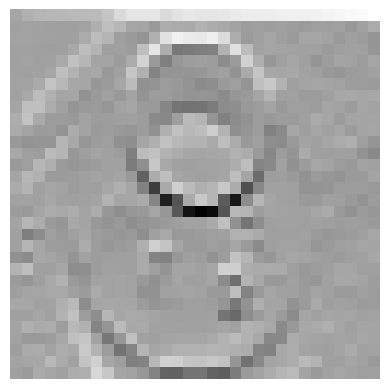

In [13]:
filter1 = np.array([
    [ 1,  1,  1],
    [ 0,  0,  0],
    [-1, -1, -1]
])

stride = 2

new_image = np.zeros((int(im.shape[0] / stride), int(im.shape[1] / stride)))

im_pad = np.pad(im,1, 'constant')

for i in range(0,im.shape[0],stride):
    for j in range(0,im.shape[1],stride):
        try:
            new_image[int(i/stride),int(j/stride)] = \
            im_pad[i-1,j-1] * filter1[0,0] + \
            im_pad[i-1,j] * filter1[0,1] + \
            im_pad[i-1,j+1] * filter1[0,2] + \
            im_pad[i,j-1] * filter1[1,0] + \
            im_pad[i,j] * filter1[1,1] + \
            im_pad[i,j+1] * filter1[1,2] +\
            im_pad[i+1,j-1] * filter1[2,0] + \
            im_pad[i+1,j] * filter1[2,1] + \
            im_pad[i+1,j+1] * filter1[2,2]
        except:
            pass

plt.axis('off')
plt.imshow(new_image, cmap='Greys');

# vertical edge filter with stride 2

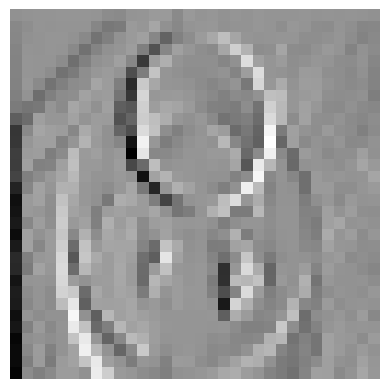

In [14]:
filter2 = np.array([
    [ -1,  0,  1],
    [ -1,  0,  1],
    [ -1,  0,  1]
])

stride = 2

new_image = np.zeros((int(im.shape[0] / stride), int(im.shape[1] / stride)))

im_pad = np.pad(im,1, 'constant')

for i in range(0,im.shape[0],stride):
    for j in range(0,im.shape[1],stride):
        try:
            new_image[int(i/stride),int(j/stride)] = \
            im_pad[i-1,j-1] * filter2[0,0] + \
            im_pad[i-1,j] * filter2[0,1] + \
            im_pad[i-1,j+1] * filter2[0,2] + \
            im_pad[i,j-1] * filter2[1,0] + \
            im_pad[i,j] * filter2[1,1] + \
            im_pad[i,j+1] * filter2[1,2] +\
            im_pad[i+1,j-1] * filter2[2,0] + \
            im_pad[i+1,j] * filter2[2,1] + \
            im_pad[i+1,j+1] * filter2[2,2]
        except:
            pass

plt.axis('off')
plt.imshow(new_image, cmap='Greys');